# 2D Homogeneous Transforms

In [8]:
import numpy as np
import matplotlib.pyplot as plt

p = np.array([[1, 3], 
              [2, 4],
              [3, 16],
              [4, 20],
              [5, 28]])
p


array([[ 1,  3],
       [ 2,  4],
       [ 3, 16],
       [ 4, 20],
       [ 5, 28]])

In [16]:
p_aug = np.insert(p, 2, np.ones([p.shape[0], ]), axis=1)
p_aug

array([[ 1,  3,  1],
       [ 2,  4,  1],
       [ 3, 16,  1],
       [ 4, 20,  1],
       [ 5, 28,  1]])

In [40]:
M = np.array([[1, 0, -1],
              [0, 1, -3],
              [0, 0, 1]])


paugT_xlate = M@p_aug.T #transpose p_aug so it's column vectors, @ is matrix multiply - this uses "broadcasting" to copy M for each
paug_xlate = paugT_xlate.T #transpose it back
paug_xlate

array([[ 0,  0,  1],
       [ 1,  1,  1],
       [ 2, 13,  1],
       [ 3, 17,  1],
       [ 4, 25,  1]])

In [46]:
ang = 90*np.pi/180 #degrees to radians transform
R = np.array([[np.cos(ang), np.sin(ang), 0],
             [-np.sin(ang), np.cos(ang), 0],
             [0, 0, 1]])

paugT_total = R@paugT_xlate
paug_total = paugT_total.T
paug_total.round(3)

array([[ 0.,  0.,  1.],
       [ 1., -1.,  1.],
       [13., -2.,  1.],
       [17., -3.,  1.],
       [25., -4.,  1.]])

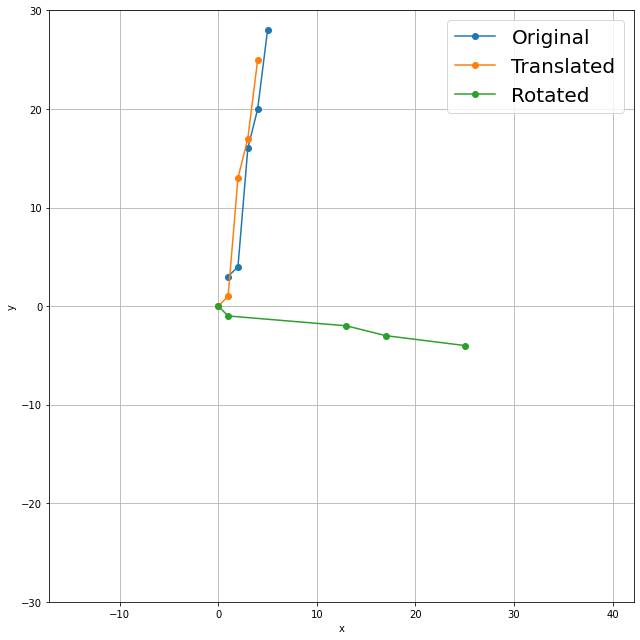

In [49]:
fig = plt.figure(figsize=(9, 9))
ax = fig.subplots(1, 1)
ax.plot(p[:, 0], p[:, 1], marker='o')
ax.plot(paug_xlate[:, 0], paug_xlate[:, 1], marker='o')
ax.plot(paug_total[:, 0], paug_total[:, 1], marker='o')
ax.axis('equal')

ax.set_ylim([-30, 30])

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(['Original', 'Translated', 'Rotated'], fontsize=20)

fig.tight_layout()